In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#Prints out all of our wonderful cities
print("Beginning Data Retrieval")
print("------------------------------")
i = 0
record = 1
v_set = 1
for city in cities:
    data = requests.get(query_url + cities[i]).json()
    if record > 50:
        record = 0
        v_set = v_set + 1
    try:
        print(f"Processing Record {record} of Set {v_set} | {cities[i]}")
    except: 
        print("City not found. Skipping ...")
    record = record + 1
    i = i + 1


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | goundam
Processing Record 3 of Set 1 | bali
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | smithers
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | amderma
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | mandera
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | toppenish
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | tsihombe
Processing Record 23 of Set 1 | sao joao da b

KeyboardInterrupt: 

In [ ]:
#Creates empty lists to hold our outputs
names = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []

i = 0

#Gets all the data for all our cities and adds it to their appropriate location
#Run the while loop if you don't want to wait an eternity
#Warns the user if data is lost

for city in cities:
#while i < 25:
    data = requests.get(query_url + cities[i]).json()
    try:
        names.append(data["name"])
        clouds.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humidity.append(data["main"]["humidity"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        max_temp.append(data["main"]["temp_max"])
        wind.append(data["wind"]["speed"])
        time.sleep(1.15)
    except:
        print(f"Appending failed city number {i}, continuing to next city")
    i = i + 1


In [6]:
#Puts all the lists into a dataframe, then the dataframe to an exported CSV
df = pd.DataFrame({
    "City":names,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind,
})
df.to_csv("Outputs/df.csv" ,index=None, header=True, encoding='utf-8')
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,66,AU,1569041453,30,-33.64,115.35,19.44,7.11
1,Goundam,79,ML,1569041788,47,16.42,-3.66,31.40,8.39
2,Bali,22,CN,1569041788,54,32.29,119.40,27.22,1.34
3,Provideniya,43,RU,1569041773,67,64.42,-173.23,0.40,1.72
4,Smithers,40,CA,1569041788,87,54.78,-127.17,11.00,1.00


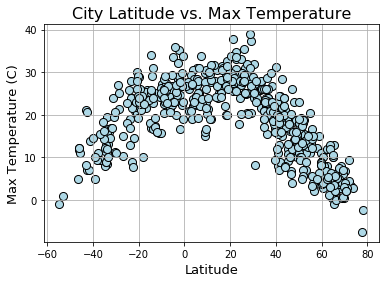

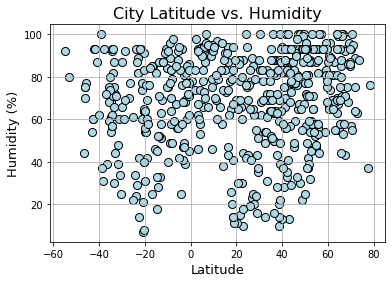

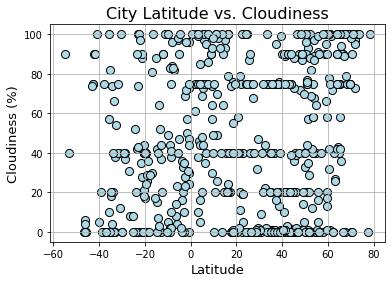

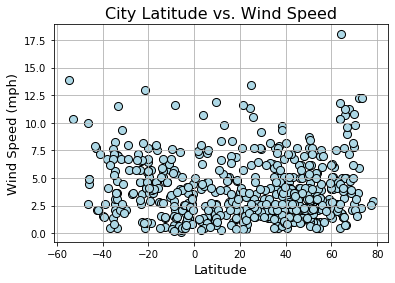

In [7]:
#Makes scatter plots for everything and exports it as a PNG
plt.scatter(lat,max_temp, marker="o",facecolors="lightblue",edgecolors="black", s=65)
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=13)
plt.xlabel("Latitude", fontsize=13)
plt.grid()
plt.savefig("Outputs/Max_temp.png")

plt.show()

plt.scatter(lat,humidity, marker="o",facecolors="lightblue",edgecolors="black", s=65)
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=13)
plt.xlabel("Latitude", fontsize=13)
plt.grid()
plt.savefig("Outputs/Humidity.png")


plt.show()

plt.scatter(lat,clouds, marker="o",facecolors="lightblue",edgecolors="black", s=65)
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.xlabel("Latitude", fontsize=13)
plt.grid()
plt.savefig("Outputs/Cloudiness.png")

plt.show()

plt.scatter(lat,wind, marker="o",facecolors="lightblue",edgecolors="black", s=65)
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.xlabel("Latitude", fontsize=13)
plt.grid()
plt.savefig("Outputs/Wind_speed.png")

plt.show()